# Neural Networks w/ MNIST
As an introduction to neural networks and deep learning, we will cover the beginner friendly MNIST data set, which is widely used as an initial tutorial for many courses. MNIST is very easy; the data set is virtually completely clean, meaning there does not have to be any stress with data processing. All we have to do is create and train a simple neural network that can recognize the handwritten digits of the data set. We will be using the Keras library, making it a breeze to program.
<img src="https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png">



## What's MNIST?

"The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.[5] Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels."

You can think of it like the "Hello World" of computer vision. Its a collection of 28 by 28 images of handwritten numbers, totalling around 60,000 training images and 10,000 testing images. We will use this to create a simple neural network.

## Neural Networks?
Neural networks are like any other supervised machine learning models—they take in an input and pushes out a desirable output through the process of labeled training. They are roughly compared to how neurons transmit signal (like I said it's a very rough analogy). They are considerably more complex than most other machine learning models, but they are relatively easy to program nowadays because of libraries. In the case of MLPs (multlayered perceptrons) AKA simple neural networks, there is an input, hidden, and output layers: 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/280px-Colored_neural_network.svg.png">

The structure of the network and its layers are often referred to as its network **architecture** or **topology**. This layered format and process of passing data through is what distinguishes neural networks from most other algorithms. 

## Example in MNIST
For MNIST, you can imagine the layout of the network being something like this: 

<img src="https://ml4a.github.io/images/figures/mnist_1layer.png">

—where the input layers takes in the flattened version of the 28 by 28 images (total 784 pixels per image) and transmits the data across its hidden layers where the magic is done. The input nodes are greyscale values of each pixels. And in the end of it all, it'll reach the output layer comprising of ten nodes, each representing the 10 digits (from 0 to 9). The general rule of thumb is that we ignore the inner mathematical operations that are taking place in the hidden layers, we only care about the outputs being right. Don't worry about knowing how the magic trick works at the moment, you can watch <a href="https://youtu.be/aircAruvnKk">3B1B's detailed explanation playlist on YouTube</a> regarding this topic (specifically the MNIST example). Remember to not get caught up on the maths.

## Neural Network Lab

I don't really want to explain and lecture stuff anymore because I believe it's pretty confusing and unhelpful for many of you. I think it's for the best we give you hands on activities like what we did last meeting so you'll gain valuable skills. AI is a broad topic and I want to get into the interesting parts quicker, like ConvNets and reinforcement learning, so I'm believing in you to be self-reliant.
Anyways, your job is to take each code segment and explain what it does in a separate ipynb (Jupyter Notebook file). Copy each of the code segments below and add a separate markdown block above explaining what the code section does.

Resources to research from:
https://www.tensorflow.org/tutorials/keras/classification,
https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb,
https://victorzhou.com/blog/keras-neural-network-tutorial/,
https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import keras

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

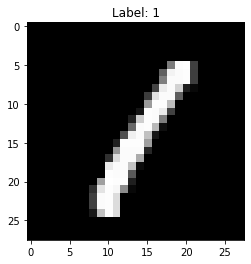

In [3]:
def imshow(i):
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
imshow(3)

In [4]:
train_images = train_images.astype('float32')   # to float
test_images = test_images.astype('float32')
train_images /= 255  # normalize
test_images /= 255

In [5]:
model = Sequential()  # initialize   
model.add(Flatten(input_shape=(28, 28)))   # add layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # compile model

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(train_images, train_labels, epochs=10)  

Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.2567 - accuracy: 0.9275
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1132 - accuracy: 0.9675
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0782 - accuracy: 0.9761
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0578 - accuracy: 0.9827
Epoch 5/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0453 - accuracy: 0.9861
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0345 - accuracy: 0.9892
Epoch 7/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0291 - accuracy: 0.9908
Epoch 8/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0225 - accuracy: 0.9933
Epoch 9/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0191 - accuracy: 0.9942
Epoch 10/10
60000/60000 [==============================

In [9]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07980159235574538
Test accuracy: 0.9787999987602234
